# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
from scipy import ndimage

Load feature names.

In [3]:
feature_names = []
with open('mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print ('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

with open('mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print (train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [5]:
def P1():
### STUDENT START ###
    # run PCA with 50 principal components
    pca = PCA(n_components = 50)
    pca.fit(train_data)
    
    #print cumulative sum of the explained variance
    for index, value in enumerate(np.cumsum(pca.explained_variance_ratio_)):
        print("k=%d,  value=%f"%(index, value))
    
### STUDENT END ###

P1()

k=0,  value=0.164043
k=1,  value=0.297278
k=2,  value=0.399013
k=3,  value=0.469646
k=4,  value=0.508313
k=5,  value=0.545121
k=6,  value=0.576403
k=7,  value=0.603741
k=8,  value=0.629905
k=9,  value=0.652215
k=10,  value=0.672697
k=11,  value=0.691380
k=12,  value=0.708724
k=13,  value=0.725568
k=14,  value=0.740756
k=15,  value=0.755842
k=16,  value=0.770133
k=17,  value=0.784254
k=18,  value=0.797504
k=19,  value=0.808968
k=20,  value=0.819678
k=21,  value=0.830336
k=22,  value=0.840746
k=23,  value=0.850683
k=24,  value=0.859763
k=25,  value=0.868457
k=26,  value=0.876413
k=27,  value=0.884171
k=28,  value=0.891547
k=29,  value=0.898549
k=30,  value=0.904962
k=31,  value=0.911107
k=32,  value=0.916830
k=33,  value=0.922167
k=34,  value=0.927426
k=35,  value=0.932453
k=36,  value=0.937443
k=37,  value=0.942003
k=38,  value=0.946530
k=39,  value=0.950928
k=40,  value=0.955123
k=41,  value=0.959100
k=42,  value=0.962801
k=43,  value=0.966396
k=44,  value=0.969777
k=45,  value=0.97276

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

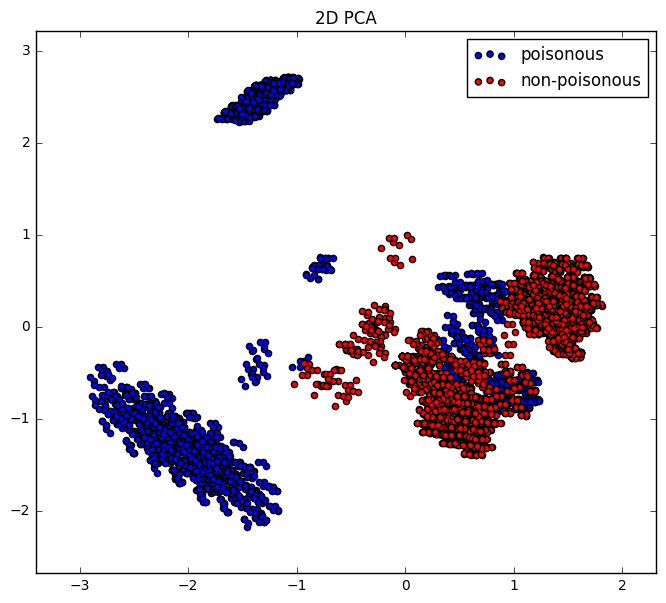

In [6]:
def P2():
### STUDENT START ###
    #Run PCA with 2 components
    pca = PCA(n_components=2)
    train_transform = pca.fit_transform(train_data)
    #get the positive classified data
    pos_data = train_transform[np.where(train_labels == 1)]
    #get negative classified data
    neg_data = train_transform[np.where(train_labels == 0)]
    
    plt.figure(figsize=(8,7))
    #scatter plot positive data
    plt.scatter(pos_data[:, 0], 
               pos_data[:, 1], c="blue", label="poisonous")
    plt.scatter(neg_data[:, 0], 
                neg_data[:, 1], c="red", label="non-poisonous")
    plt.xlim(train_transform[:,0].min()-.5, train_transform[:,0].max()+.5)
    plt.ylim(train_transform[:,1].min()-.5, train_transform[:,1].max()+.5)
    plt.title('2D PCA')
    plt.legend()
    plt.show()
### STUDENT END ###

P2()


(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

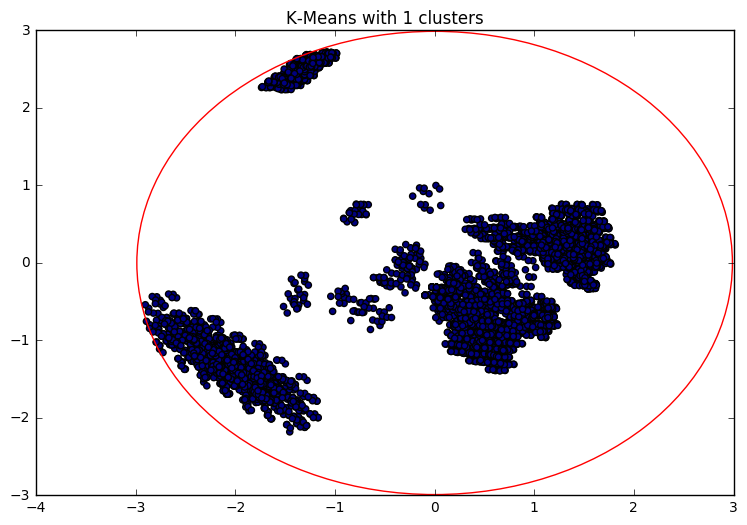

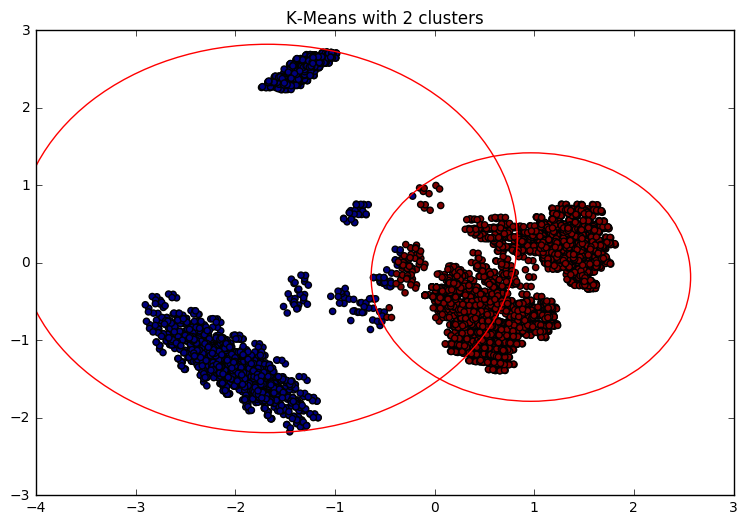

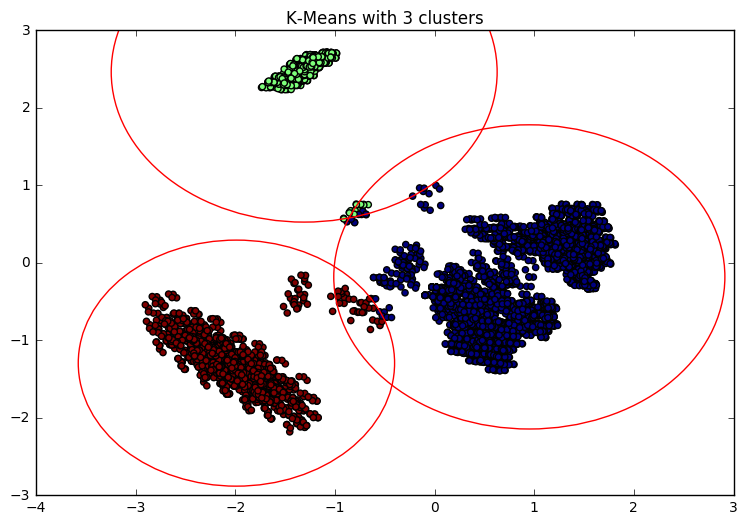

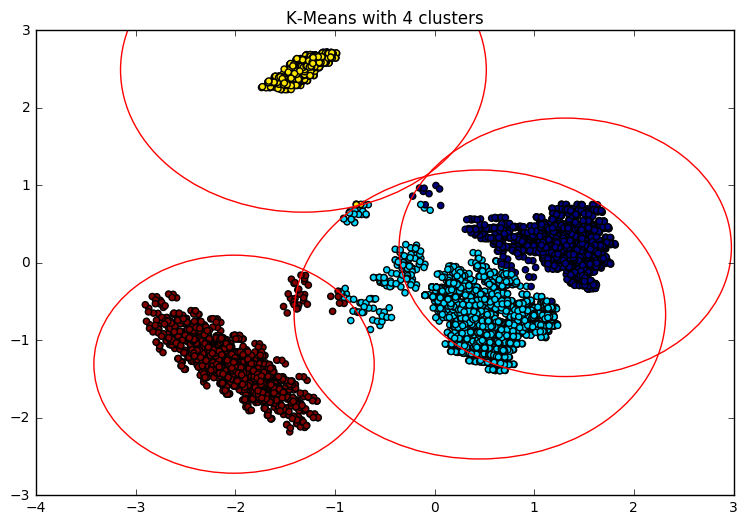

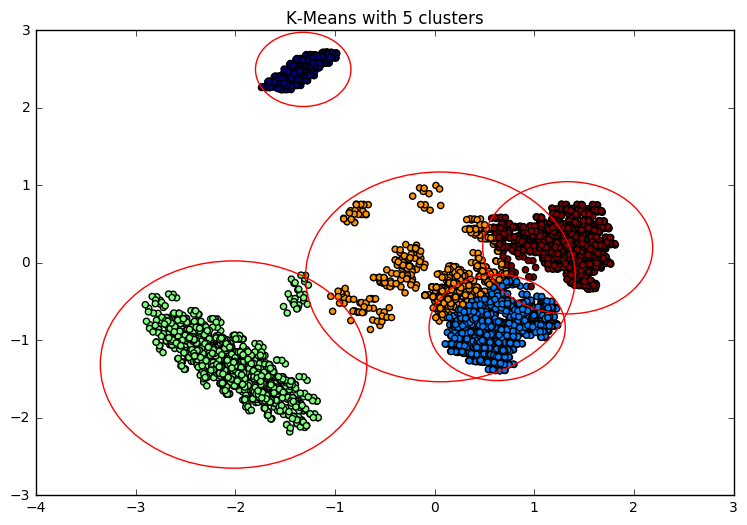

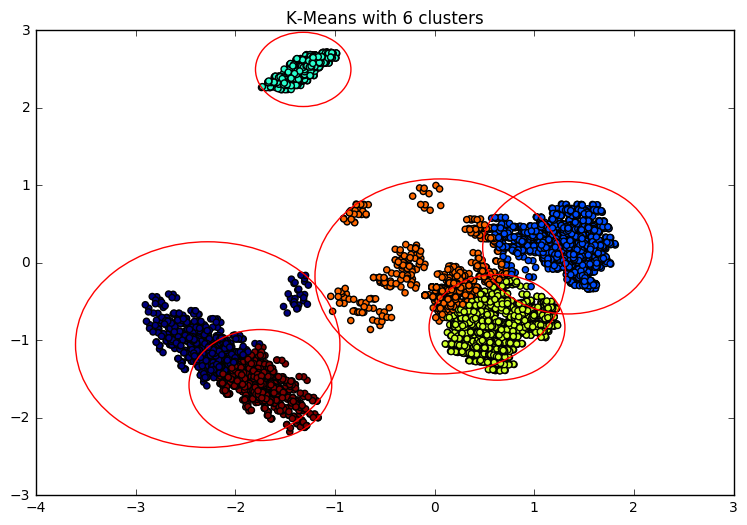

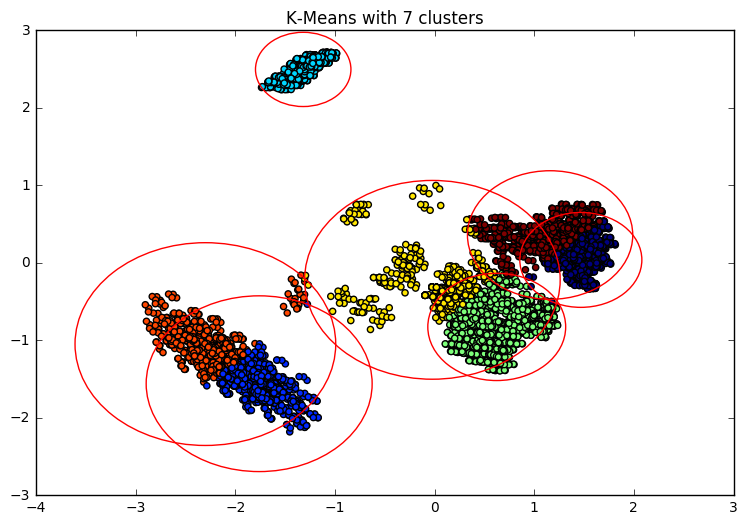

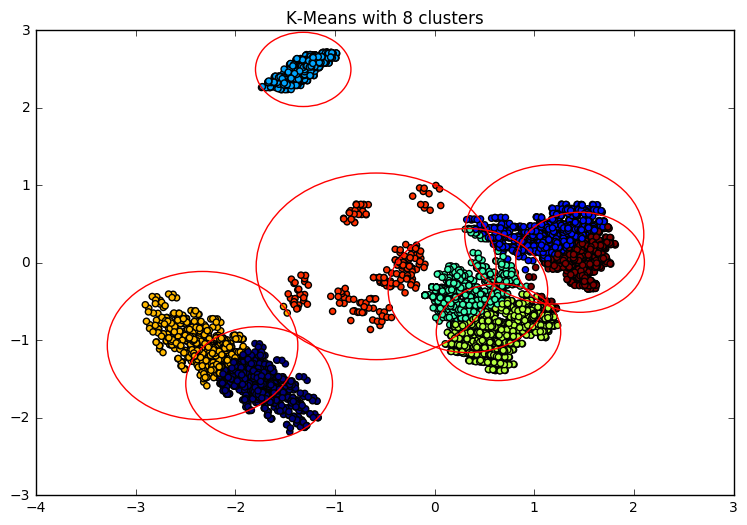

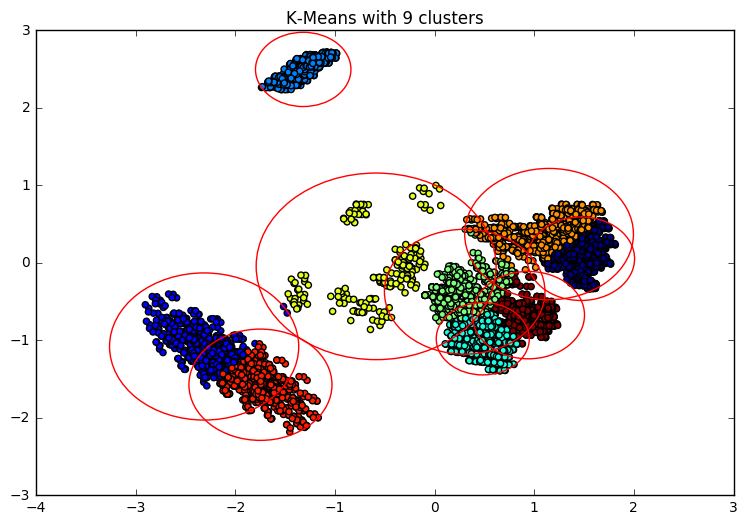

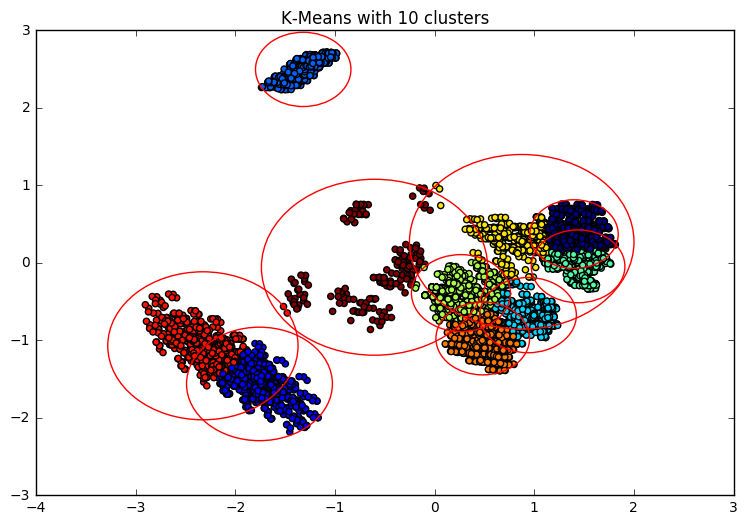

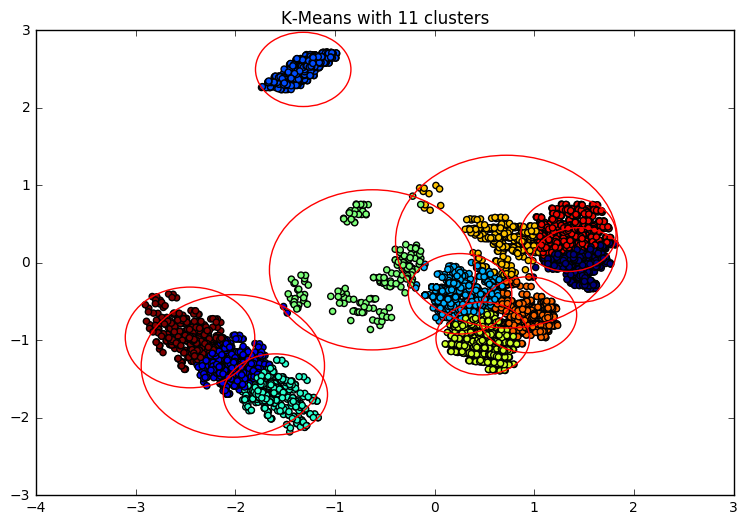

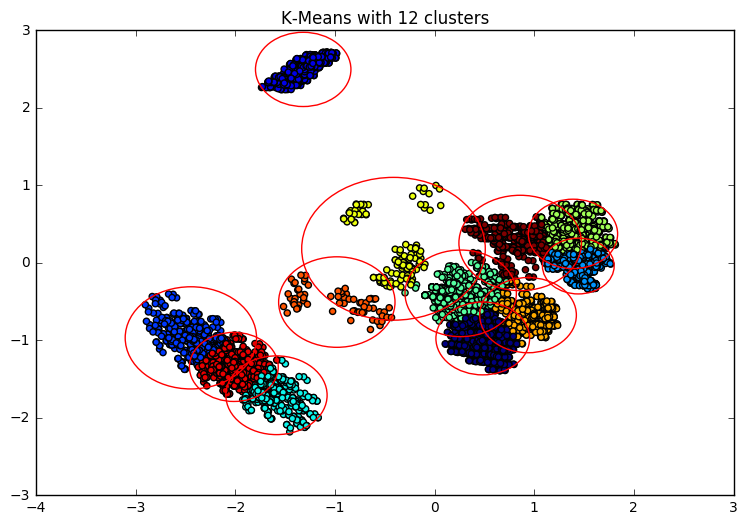

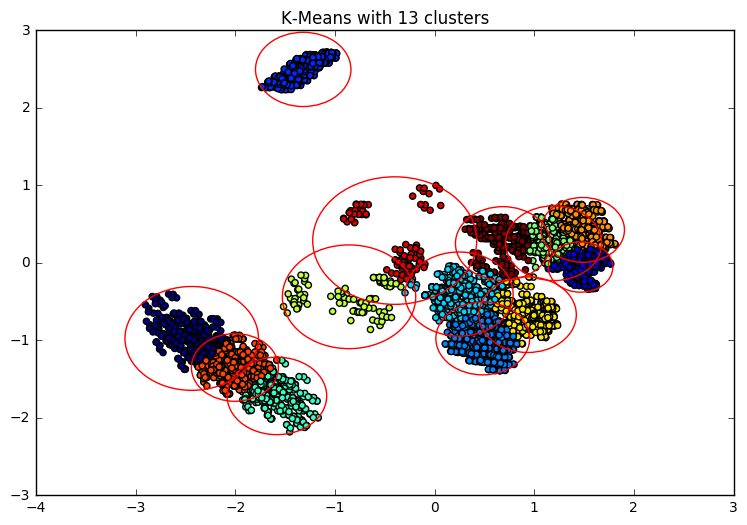

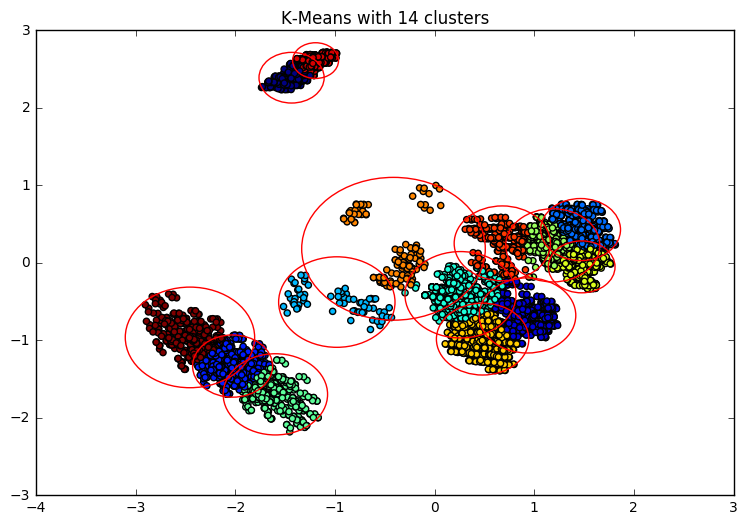

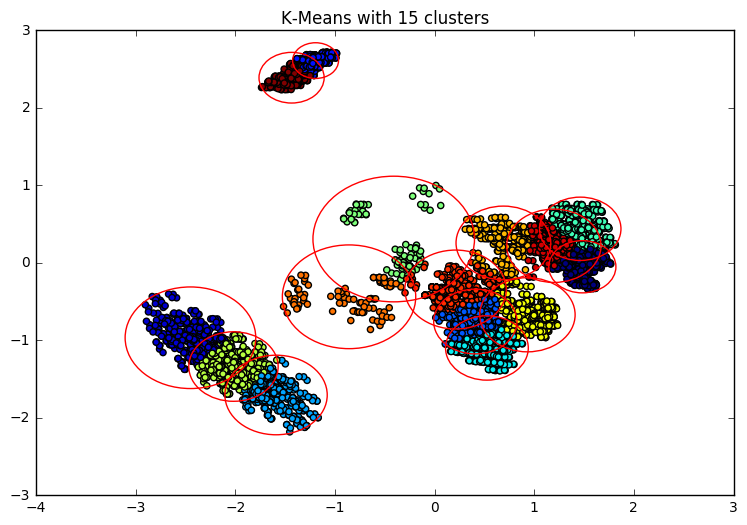

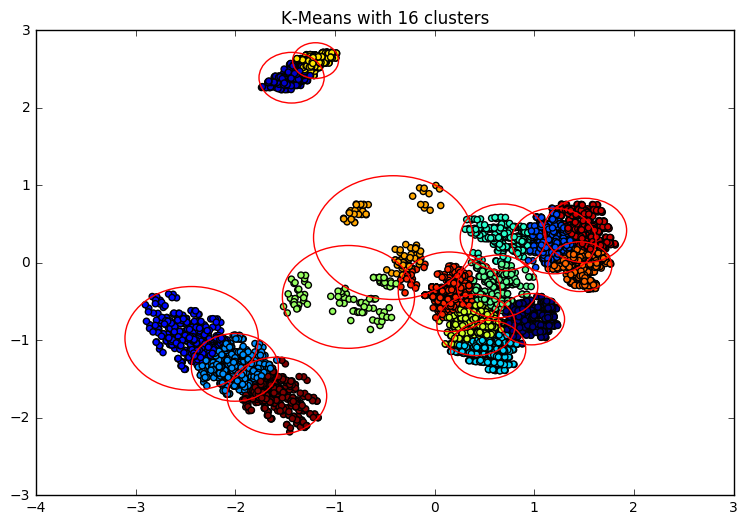

In [33]:
def P3():
### STUDENT START ###
    #run pca
    pca = PCA(n_components=2)
    train_transform = pca.fit_transform(train_data)
    #run kmeans for different cluster sizes
    for k in range (1,17):
        
        km = KMeans(n_clusters=k)
        preds = km.fit_predict(train_transform)
        #plot the cluster
        plt.figure(figsize=(9,6))
        plt.scatter(train_transform[:, 0], train_transform[:, 1], c=preds)
        plt.title('K-Means with %d clusters'%k)
        #for each cluster find the points belonging to that cluster and find the point with the max distance
        #draw a circle with cluster center as center and max distance radius
        for index, center in enumerate(km.cluster_centers_):
            #get the points belonging to this cluster
            cvals = train_transform[np.where(preds == index)]
            #calculate the distance of each point from center and find the max distance
            maxdist = np.max(metrics.pairwise_distances(cvals,km.cluster_centers_[index].reshape(1,-1)))
            plt.gcf().gca().add_artist(plt.Circle((center[0],center[1]),maxdist,color='r', fill=False))

        plt.show()
        
### STUDENT END ###
P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

Number of Components: 1


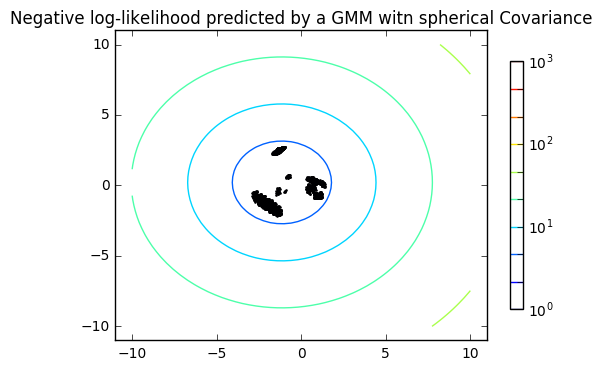

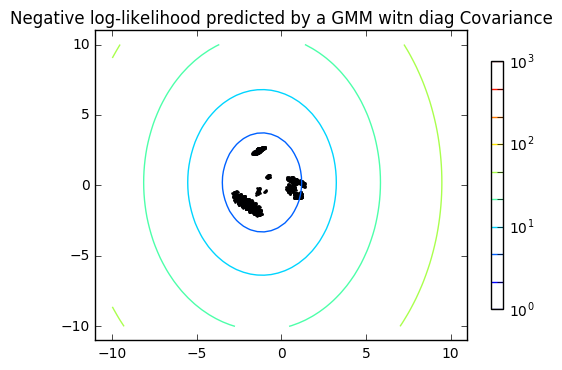

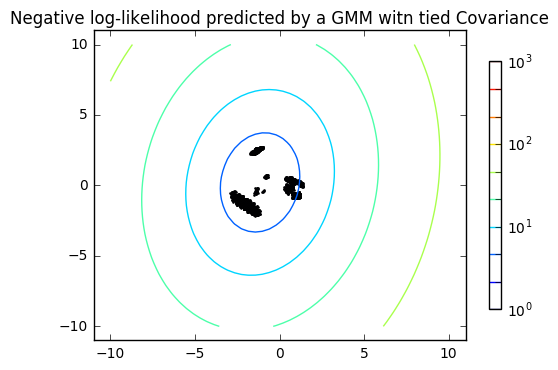

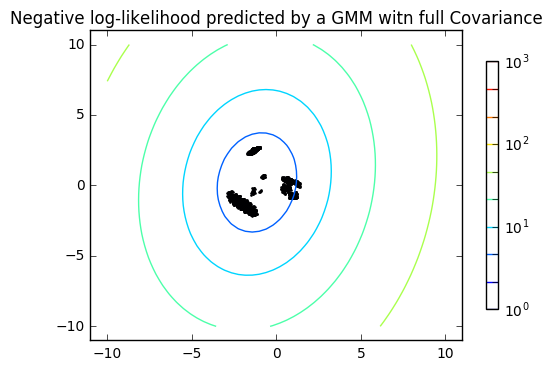

Number of Components: 2


C:\Users\sapate\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


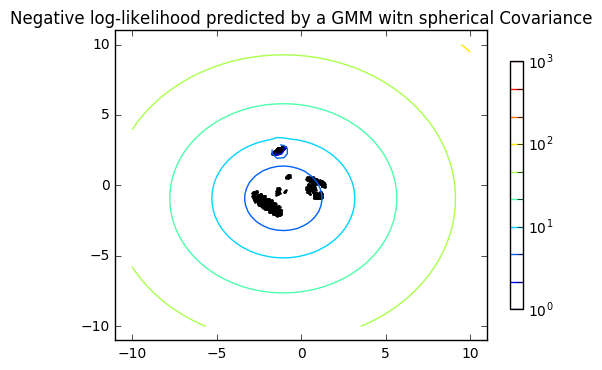

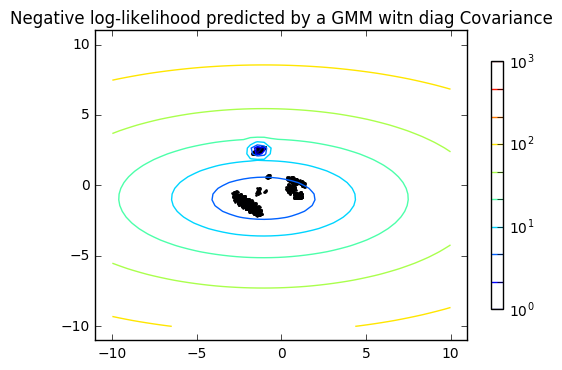

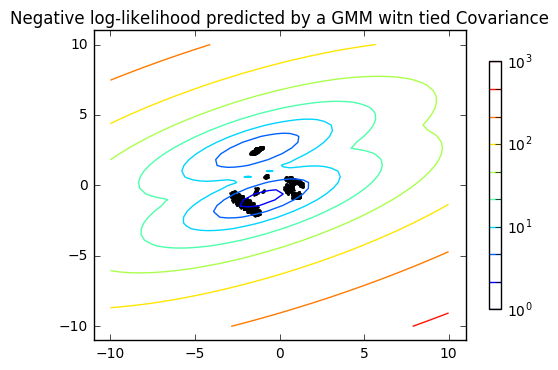

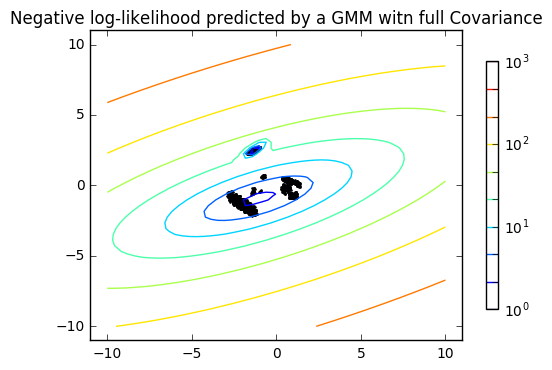

Number of Components: 3


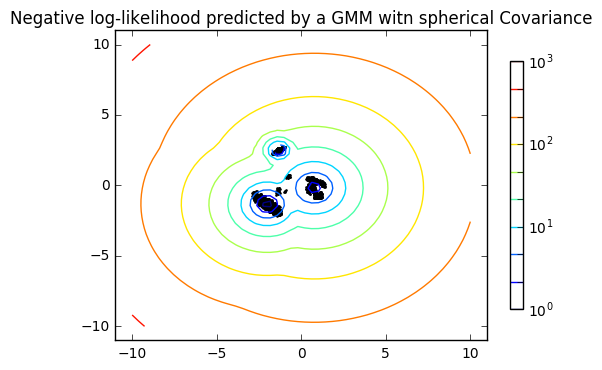

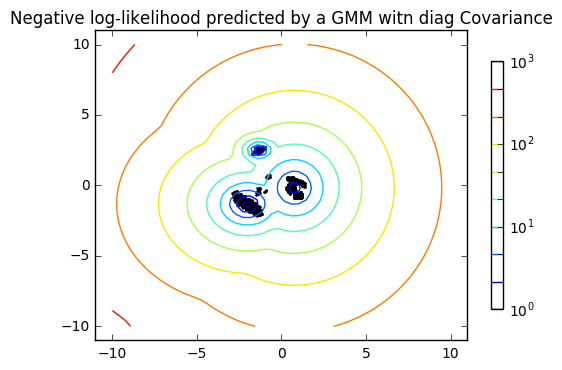

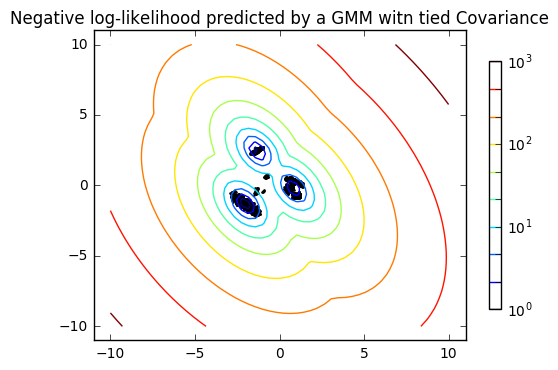

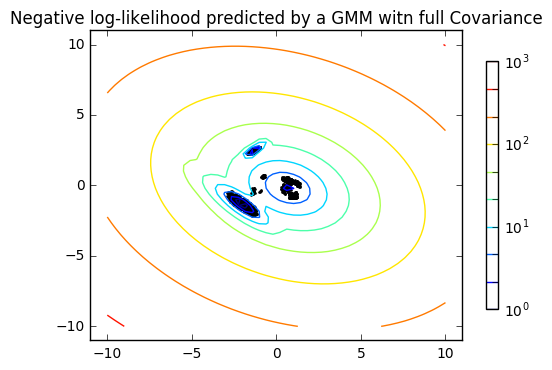

Number of Components: 4


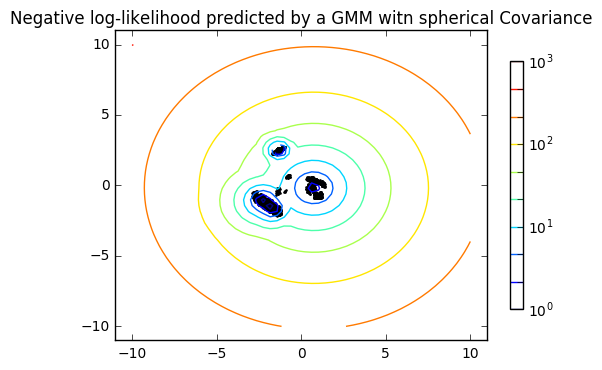

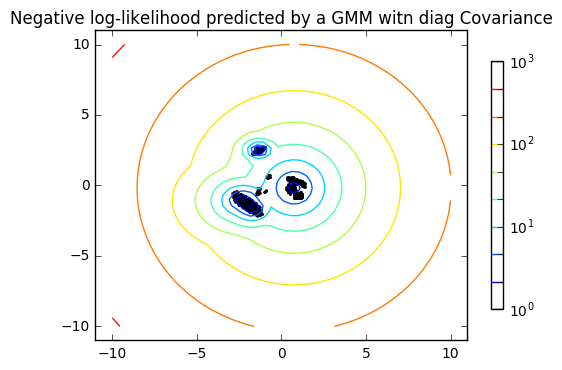

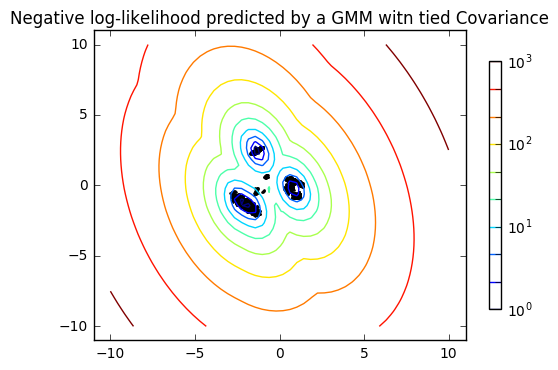

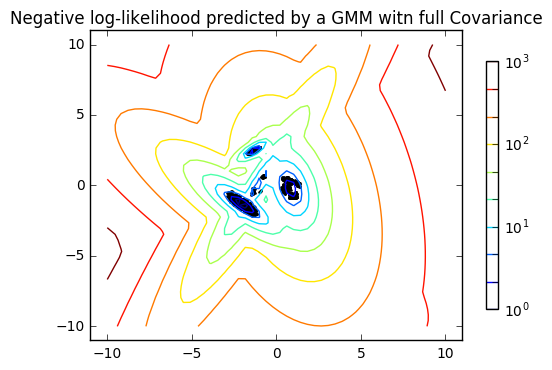

In [12]:
def P4():
### STUDENT START ###
    #run pca wit 2 components
    pca = PCA(n_components=2)
    train_transform = pca.fit_transform(train_data)
    #get the positive classified data
    pos_data = train_transform[np.where(train_labels == 1)]
    
    cmatrix = ['spherical', 'diag', 'tied', 'full']
    
    for i in range(1,5):
        print("Number of Components: " + str(i))
        
        for cm in cmatrix:
            # fit a Gaussian Mixture Model with i components and cm covariance type
            clf = GMM(n_components=i, covariance_type=cm)
            clf.fit(pos_data)

            # display predicted scores by the model as a contour plot 
            x = np.linspace(-10., 10.)
            y = np.linspace(-10., 10.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -clf.score_samples(XX)[0]
            Z = Z.reshape(X.shape)

            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(pos_data[:, 0], pos_data[:, 1], .8)

            plt.title('Negative log-likelihood predicted by a GMM witn %s Covariance'%cm)
            plt.axis('tight')
            plt.show()
### STUDENT END ###
P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [13]:
def P5():
### STUDENT START ###
    pca = PCA(n_components=2)
    train_transform = pca.fit_transform(train_data)
    test_transform = pca.transform(test_data)
    #get the positive classified data
    pos_data = train_transform[np.where(train_labels == 1)]
    #get negative classified data
    neg_data = train_transform[np.where(train_labels == 0)]
    
    #fit a 4 component GMM for positive example
    gmmPos = GMM(n_components=4, covariance_type='full')
    gmmPos.fit(pos_data)
    #fit a 4 component GMM for negative example
    gmmNeg = GMM(n_components=4, covariance_type='full')
    gmmNeg.fit(neg_data)
    #get score for test data
    posScore = gmmPos.score(test_transform)
    negScore = gmmNeg.score(test_transform)
    
    #predict 1 if pos score is greater else 0
    preds = [1 if pos > neg else 0 for pos , neg in zip(posScore, negScore)]
    
    print("Accuracy: ",np.mean(preds == test_labels))
### STUDENT END ###
P5()

Accuracy:  0.951067615658


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [16]:
def P6():
### STUDENT START ###
    #covarience type array
    cmTypes = ['spherical', 'tied', 'diag', 'full']
    maxAccuracy = 0
    #for each covarience type 
    for cm in cmTypes:
        for n_comp_pca in range(1,4):
            for n_comp_gmm in range(1,4):

                pca = PCA(n_components=n_comp_pca)
                train_transform = pca.fit_transform(train_data)
                test_transform = pca.transform(test_data)
                
                #get the positive classified data
                pos_data = train_transform[np.where(train_labels == 1)]
                #get negative classified data
                neg_data = train_transform[np.where(train_labels == 0)]
                
                #fit a 4 component GMM for positive example
                gmmPos = GMM(n_components=n_comp_gmm, covariance_type=cm)
                gmmPos.fit(pos_data)
                #fit a 4 component GMM for negative example
                gmmNeg = GMM(n_components=n_comp_gmm, covariance_type=cm)
                gmmNeg.fit(neg_data)
                #get score for test data
                posScore = gmmPos.score(test_transform)
                negScore = gmmNeg.score(test_transform)
                
                #predict 1 if pos score is greater else 0
                preds = [1 if pos > neg else 0 for pos , neg in zip(posScore, negScore)]
                accuracy = np.mean(preds == test_labels)
                
                if(maxAccuracy < accuracy):
                    maxAccuracy = accuracy
                    
                print("PCA:%d , GMM:%d , Covariance:%s , Total Components:%d"% (n_comp_pca,n_comp_gmm,cm,(n_comp_pca * 2 * n_comp_gmm * 2)) )
                print("Accuracy: ",accuracy)
    
    print("MaxAccuracy:%f"%maxAccuracy)
### STUDENT END ###
P6()


PCA:1 , GMM:1 , Covariance:spherical , Total Components:4
Accuracy:  0.844306049822
PCA:1 , GMM:2 , Covariance:spherical , Total Components:8
Accuracy:  0.899466192171
PCA:1 , GMM:3 , Covariance:spherical , Total Components:12
Accuracy:  0.903024911032
PCA:2 , GMM:1 , Covariance:spherical , Total Components:8
Accuracy:  0.860320284698
PCA:2 , GMM:2 , Covariance:spherical , Total Components:16
Accuracy:  0.873665480427
PCA:2 , GMM:3 , Covariance:spherical , Total Components:24
Accuracy:  0.943060498221
PCA:3 , GMM:1 , Covariance:spherical , Total Components:12
Accuracy:  0.871886120996
PCA:3 , GMM:2 , Covariance:spherical , Total Components:24
Accuracy:  0.868327402135
PCA:3 , GMM:3 , Covariance:spherical , Total Components:36
Accuracy:  0.903914590747
PCA:1 , GMM:1 , Covariance:tied , Total Components:4
Accuracy:  0.844306049822
PCA:1 , GMM:2 , Covariance:tied , Total Components:8
Accuracy:  0.884341637011
PCA:1 , GMM:3 , Covariance:tied , Total Components:12
Accuracy:  0.908362989324


From the results we get max accuracy of 0.963523131673 with 36 component but with 24 components we get an accuracy of 0.946619217082 . So from accuracy to components ratio we get better returns by using 24 components.